In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
class LogisticRegression:
    def __init__(self, iters = 20, lr = 0.01):
        self.iters = iters
        self.lr = lr
        
    def fit(self, X, y):
        
        temp = np.ones((X.shape[0], 1))
        X = np.hstack((temp, X))
        
        m = X.shape[0]
        n = X.shape[1]
        
        self.theta = np.random.randn(n, 1)
        cost = []
        
        for iteration in range(self.iters):
            
            #modify the parameters
            for row in range(m):
                
                decision_bound = np.dot(X[row].reshape(1, -1), self.theta)
                
                
                sigmoid = 1 / (1 + np.e ** -decision_bound[0])
                
                for f_no in range(n):
                    
                    self.theta[f_no] -= self.lr * X[row][f_no] * (sigmoid - y[row]) / m
                    
            #calculate the cost   
            error = 0
            for row in range(m):
                decision_bound = np.dot(X[row].reshape(1, -1), self.theta)
                sigmoid = 1 // (1 + np.e ** -decision_bound[0])
                error += y[row] * np.log(sigmoid) + (1 - y[row]) * np.log(1-sigmoid)
                
            cost.append(-error // m)
        
        print("Model Fitted!")           
            
        
    def predict(self, X):
        temp = np.ones((X.shape[0], 1))
        X = np.hstack((temp, X))
        
        result = []
        for row in range(X.shape[0]):
            t = np.dot(X[row], self.theta)
            sigmoid = 1 / (1 + np.e ** -t)
            result.append(1 if sigmoid > 0.5 else 0)
        
            
        result = np.array(result)
        return result
    
    
    def accuracy(self, X, y):
        result = self.predict(X)
        
        score = 0
        
        for i in range(len(result)):
            if result[i] == int(y[i]):
                score += 1
                
                
        return score / len(result)
            

In [13]:
df = pd.read_csv("classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


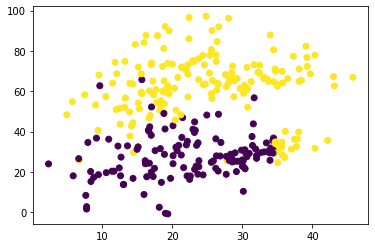

In [14]:
X = np.array(df.drop(["success"], axis = 1))
y = np.array(df["success"], dtype = np.int32)

plt.scatter(X[:, 0], X[:, 1], c = y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

Model Fitted!


<ipython-input-12-d58e5e166ffd>:36: RuntimeWarning: divide by zero encountered in log
  error += y[row] * np.log(sigmoid) + (1 - y[row]) * np.log(1-sigmoid)
<ipython-input-12-d58e5e166ffd>:36: RuntimeWarning: invalid value encountered in multiply
  error += y[row] * np.log(sigmoid) + (1 - y[row]) * np.log(1-sigmoid)
<ipython-input-12-d58e5e166ffd>:38: RuntimeWarning: invalid value encountered in floor_divide
  cost.append(-error // m)


In [16]:
model.predict(X_test[:10])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [17]:
y_test[:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [18]:
model.accuracy(X_test, y_test)

0.8686868686868687

In [19]:
model.accuracy(X_train, y_train)

0.8080808080808081

In [20]:
model.theta

array([[-1.26026329],
       [-0.04702635],
       [ 0.06498391]])